In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import glob
import os.path as osp
from PIL import Image

import torchvision.datasets as dset
import torchvision.transforms as T
import chest_xray_code.data.xrays as preprocess_dataset
import chest_xray_code.data.raw_reports as utils
import os
import torch.nn.functional as F
from models.NewConvModel import NewConvNet 
from models.TestConvNet import TestConvNet
from models.OscarConvModel import OscarNet as ConvNet16
from loaders.XrayLoader import XrayLoader
from loaders.BloodCellLoader import BloodCellLoader
from loaders.BloodCellLoader256 import BloodCellLoader256
from loaders.MuseumLoader import MuseumLoader
from loaders.MuseumLoader256 import MuseumLoader256

import numpy as np

In [2]:
xray_set = XrayLoader(
    root='chest_xray_code/data/xrays',
    preload=False, transform=transforms.ToTensor(),
)
xray_loader = DataLoader(xray_set, batch_size=20, shuffle=False, num_workers=32)

blood_set = BloodCellLoader(
    root='blood_cells_data/dataset2-master/images/TEST_SIMPLE',
    preload=False, transform=transforms.ToTensor(),
)

blood_cell_loader = DataLoader(blood_set, batch_size=20, shuffle=False, num_workers=32)

blood_set256 = BloodCellLoader256(
    root='blood_cells_data/dataset2-master/images/TEST_SIMPLE',
    preload=False, transform=transforms.ToTensor(),
)

blood_cell_loader256 = DataLoader(blood_set256, batch_size=20, shuffle=False, num_workers=32)

museum_set = MuseumLoader(
    root='museum_data/dataset_updated/validation_set',
    preload=False, transform=transforms.ToTensor(),
)

museum_loader = DataLoader(museum_set, batch_size=20, shuffle=False, num_workers=32)


museum_set256 = MuseumLoader256(
    root='museum_data/dataset_updated/validation_set',
    preload=False, transform=transforms.ToTensor(),
)

museum_loader256 = DataLoader(museum_set256, batch_size=20, shuffle=False, num_workers=32)

print(len(museum_set))
print(len(museum_set256))

40
40


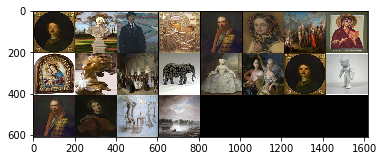

Process Process-9:
KeyboardInterrupt
Traceback (most recent call last):
Process Process-6:
Process Process-5:
Process Process-15:
Process Process-14:
Process Process-18:
Process Process-17:
Process Process-8:
Process Process-7:
Process Process-16:
Traceback (most recent call last):
Process Process-20:
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-2:
Traceback (most recent call last):
Process Process-1:
Traceback (most recent call last):
Process Process-29:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process Process-25:
Process Process-27:
Process Process-31:
Process Process-26:
Process Process-30:
Process Process-28:
Traceback (most recent call last):
Process Process-21:
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Process Process-32:
Process Process-23:
Process Process-22:
Pro

  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/

  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/shared/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multipr

  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
  File "/home/shared/anaconda3/lib/python3.6/multiprocessing/c

In [3]:
def imshow_noax(img, normalize=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    img = img.numpy()
    
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 2 * (img - img_min) / (img_max - img_min)
    
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.savefig('compressed.png')
    
    # functions to show an image
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.savefig('original.png')

# get some random training images
dataiter = iter(museum_loader)
images = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

In [4]:
USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
    torch.set_default_tensor_type('torch.cuda.FloatTensor')
    #dtype = torch.cuda.FloatTensor
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 5


# Architecture

In [5]:
def train(model, epoch, log_interval=100):
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    model = torch.nn.DataParallel(model)
    model.train()  # set training mode
    iteration = 0
    for ep in range(epoch):
        for batch_idx, (data) in enumerate(trainset_loader):
            data = data.to(device=device, dtype=dtype)
            optimizer.zero_grad()
            #print(data.shape)
            reconstruction = model(data)
            loss_function = nn.MSELoss(size_average=True)
            loss = loss_function(reconstruction, data)
            loss.backward()
            optimizer.step()
        if ep % print_every == 0:
            print('Iteration %d, loss = %.4f' % (ep, loss.item()))
            print()

def test():
    model.eval()  # set evaluation mode
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data in testset_loader:
            data = data.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item() # sum up batch loss
            pred = output.max(1, keepdim=True)[1] # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testset_loader.dataset)
    print('\nTest set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testset_loader.dataset),
        100. * correct / len(testset_loader.dataset)))
    

In [6]:
channels = 3
size = 32
model100 = TestConvNet(channels,size)
model100.load_state_dict(torch.load('old_museum.pt'))
model50 = NewConvNet(channels,size,device)
model50.load_state_dict(torch.load('new_museum.pt'))
model16 = torch.load('museum256.pt')

/home/shared/anaconda3/lib/python3.6/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'models.TestConvNet.TestConvNet' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


Visualize the Compressed images 

In [50]:
#model = torch.load('trained_models/xraymodelV2.pt')

plt.close("all")


all_images = [[],[],[],[]]

def prep(img):
    img = img.numpy()
    if True:
        img_max, img_min = np.max(img), np.min(img)
        img = (img - img_min) / (img_max - img_min) 
    return np.transpose(img, (1, 2, 0)) 
    
def save_compressed(self,input,output):
    #for i in range(1):
    img = output.cpu().detach()
    for i in range(img.shape[0]):
        individual_img = img[i]
        all_images[1].append(prep(individual_img))

def save_original_and_jpeg(data,path,q):
    img = data.cpu().detach()

    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        all_images[0].append(individual_img) #append original

        rescaled = (255.0 * individual_img)
        rescaled = rescaled.astype('uint8')
        
        PIL_img = Image.fromarray(rescaled)
        jpeg_filename =  path +"/"+ str(i) + "jpeg.jpeg"
        PIL_img.save(jpeg_filename,"JPEG",quality=q)
     
        jpeg_compressed = Image.open(jpeg_filename)
        jpeg_compressed = np.asarray(jpeg_compressed)
        #jpeg_compressed = np.transpose(jpeg_compressed,(1,2,0))
        all_images[3].append(jpeg_compressed) #append jpeg

def save_reconstructed(r):
    r = r.cpu().detach()
    
    for i in range(r.shape[0]):
        individual_img = r[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        individual_img = np.clip(individual_img,0,1)
        all_images[2].append(individual_img)
        

def save_original(data):
    img = data.cpu().detach()
    
    for i in range(img.shape[0]):
        individual_img = img[i]
        individual_img = individual_img.numpy()
        individual_img = np.transpose(individual_img, (1, 2, 0))
        all_images[0].append(individual_img)


#hook.remove()
def save_from_numpy(img,file_path):
    img = 255.0 * img
    img = img.astype('uint8')
    if img.shape[2] != 3:
        img = np.transpose(img,(1,2,0))
    img = Image.fromarray(img)
    img.save(file_path)



def visualize(dataset_loader,model,file_path,quality):
    i = 0
    print("hello")
    
    hook = model.conv_compress_final.register_forward_hook(save_compressed)
    
    
    reconstruction = None
    print("iterating through dataset")
    for data in dataset_loader:
        with torch.no_grad():
            if i > 0: break
            data = data.to(device)
            save_original_and_jpeg(data,file_path,quality)
            reconstruction = model(data)
            save_reconstructed(reconstruction)
            i+=1

    for i in range(20):
        plt.figure()
        org = all_images[0][i]
        print(org.shape)
        save_from_numpy(org,file_path+"/"+str(i)+"org.png")
        plt.subplot(1, 4, 1)
        plt.axis('off')
        #imshow_noax(org, normalize=False)
        plt.imshow(org)
        plt.title('Original')
        plt.subplot(1, 4, 2)
        com = all_images[1][i]
        plt.imshow(com)
        save_from_numpy(com,file_path+"/"+str(i)+"com.png")
        print(com.shape)
        #imshow_noax(rec, normalize=False)
        plt.title('Compressed')
        plt.axis('off')
        plt.subplot(1, 4, 3)
        recon = all_images[2][i]
        print(recon.shape)
        save_from_numpy(recon,file_path+"/"+str(i)+"recon.png")
        plt.axis('off')
        plt.imshow(recon)
        plt.title('Reconstructed')
        plt.subplot(1, 4, 4)
        jpg = all_images[3][i]
        #save_from_numpy(jpg,file_path+"/"+str(i)+"jpg.png")
        print(jpg.shape)
        plt.axis('off')
        plt.imshow(jpg)
        plt.title('JPG')
        plt.show()
        



Visualize the Reconstructed Images

hello
iterating through dataset
(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


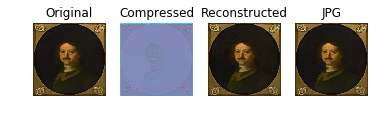

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


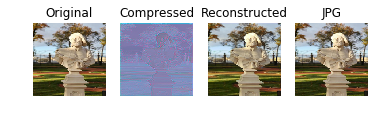

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


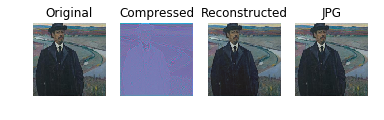

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


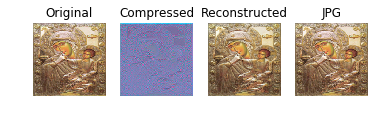

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


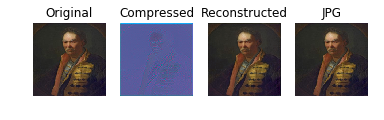

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


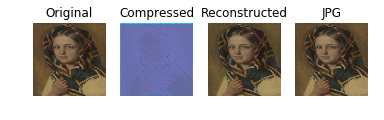

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


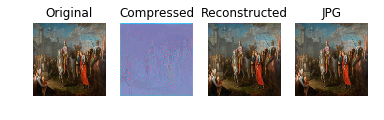

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


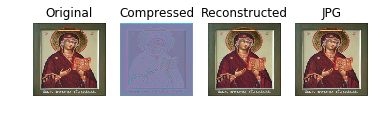

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


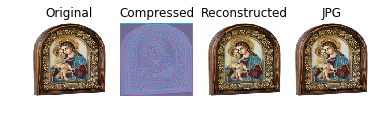

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


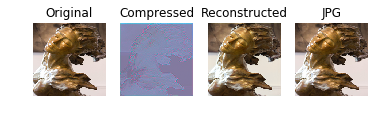

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


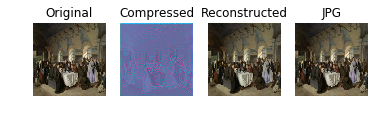

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


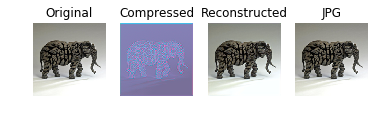

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


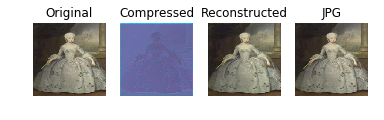

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


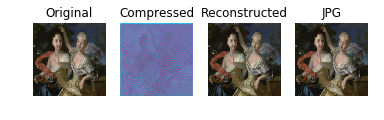

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


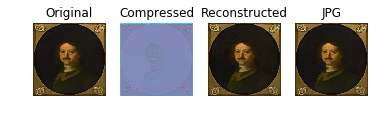

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


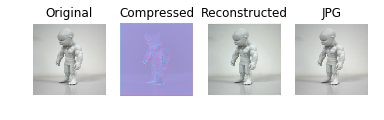

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


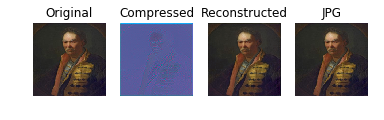

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


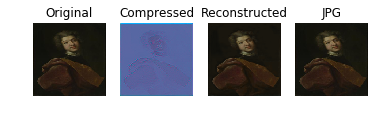

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


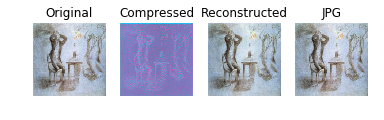

(200, 200, 3)
(100, 100, 3)
(200, 200, 3)
(200, 200, 3)


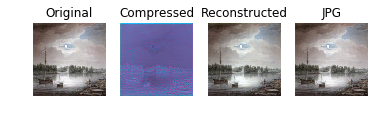

hello
iterating through dataset
(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


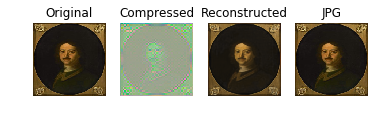

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


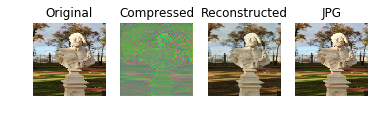

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


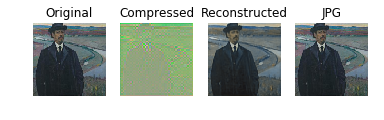

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


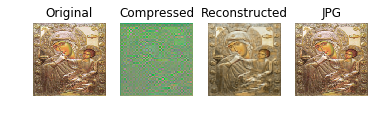

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


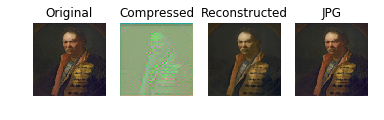

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


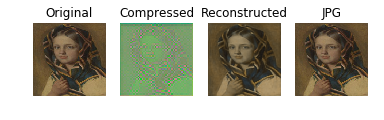

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


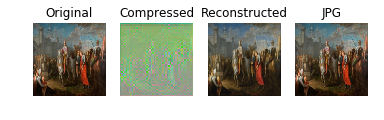

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


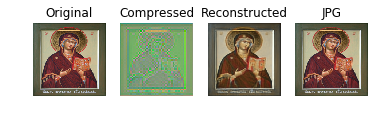

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


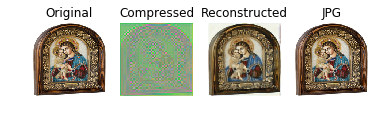

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


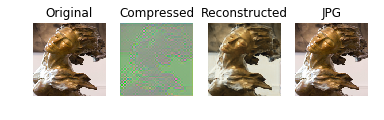

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


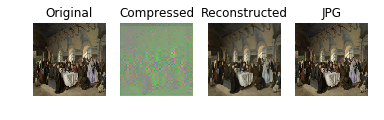

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


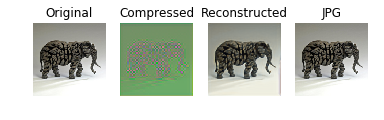

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


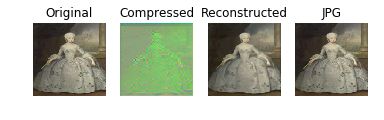

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


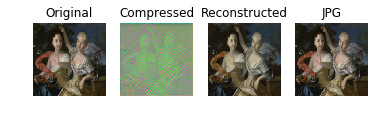

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


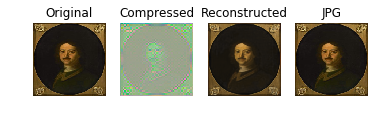

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


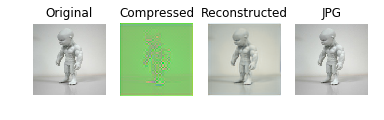

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


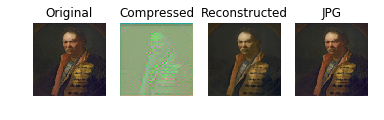

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


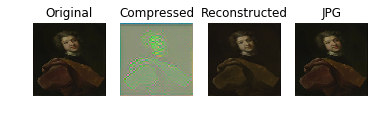

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


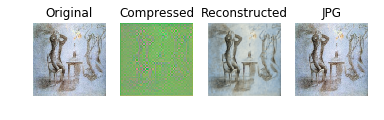

(200, 200, 3)
(50, 50, 3)
(200, 200, 3)
(200, 200, 3)


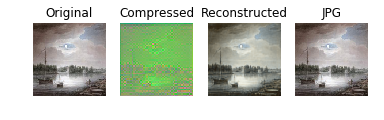

hello
iterating through dataset
(256, 256, 3)
(32, 32, 3)
(64, 64, 32)


TypeError: Cannot handle this data type

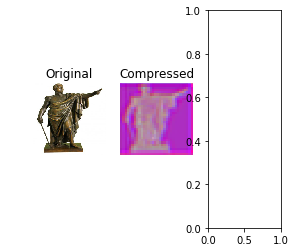

In [49]:
visualize(museum_loader,model100,"results/museum/100",100)
all_images = [[],[],[],[]]
visualize(museum_loader,model50,"results/museum/50",95)
all_images = [[],[],[],[]]
visualize(museum_loader256,model16,"results/museum/16",1)
